In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль для графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

# Загрузка данных (если еще не загружены)
try:
    df = pd.read_parquet('transaction_fraud_data.parquet')
except FileNotFoundError:
    print("Файл 'transaction_fraud_data.parquet' не найден.")
    df = pd.DataFrame()

def analyze_risk_by_category(dataframe, category_column, top_n=None):
    """
    Анализирует риск мошенничества по заданной категории.
    
    Args:
        dataframe (pd.DataFrame): Исходный датафрейм.
        category_column (str): Название колонки для группировки.
        top_n (int, optional): Количество топ-категорий для отображения.
    
    Returns:
        pd.DataFrame: Агрегированные данные с уровнем мошенничества.
    """
    if dataframe.empty:
        return pd.DataFrame()

    # Группируем данные и считаем метрики
    analysis = dataframe.groupby(category_column).agg(
        total_transactions=('transaction_id', 'count'),
        fraud_transactions=('is_fraud', 'sum')
    ).reset_index()
    
    # Считаем уровень мошенничества в процентах
    analysis['fraud_rate'] = (analysis['fraud_transactions'] / analysis['total_transactions']) * 100
    
    # Сортируем по уровню риска
    analysis = analysis.sort_values('fraud_rate', ascending=False)
    
    # Если указано top_n, берем срез
    if top_n:
        analysis = analysis.head(top_n)
        
    return analysis

def plot_risk_analysis(analysis_df, category_column):
    """
    Строит двухосевую диаграмму для визуализации риска.
    """
    if analysis_df.empty:
        print(f"Нет данных для построения графика по категории '{category_column}'.")
        return

    fig, ax1 = plt.subplots()

    # Столбчатая диаграмма для общего количества транзакц   ий (левая ось)
    sns.barplot(x=category_column, y='total_transactions', data=analysis_df, ax=ax1, color='lightblue', alpha=0.8)
    ax1.set_ylabel('Общее количество транзакций', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.tick_params(axis='x', rotation=45)
    plt.setp(ax1.get_xticklabels(), ha='right')

    # Создаем вторую ось Y
    ax2 = ax1.twinx()

    # Линейный график для уровня мошенничества (правая ось)
    sns.lineplot(x=category_column, y='fraud_rate', data=analysis_df, ax=ax2, color='r', marker='o', sort=False)
    ax2.set_ylabel('Уровень мошенничества (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(0, max(analysis_df['fraud_rate']) * 1.15) # Оставляем немного места сверху

    plt.title(f'Анализ риска и объема транзакций по "{category_column}"', fontsize=16)
    fig.tight_layout() # Чтобы метки не накладывались
    plt.show()
    

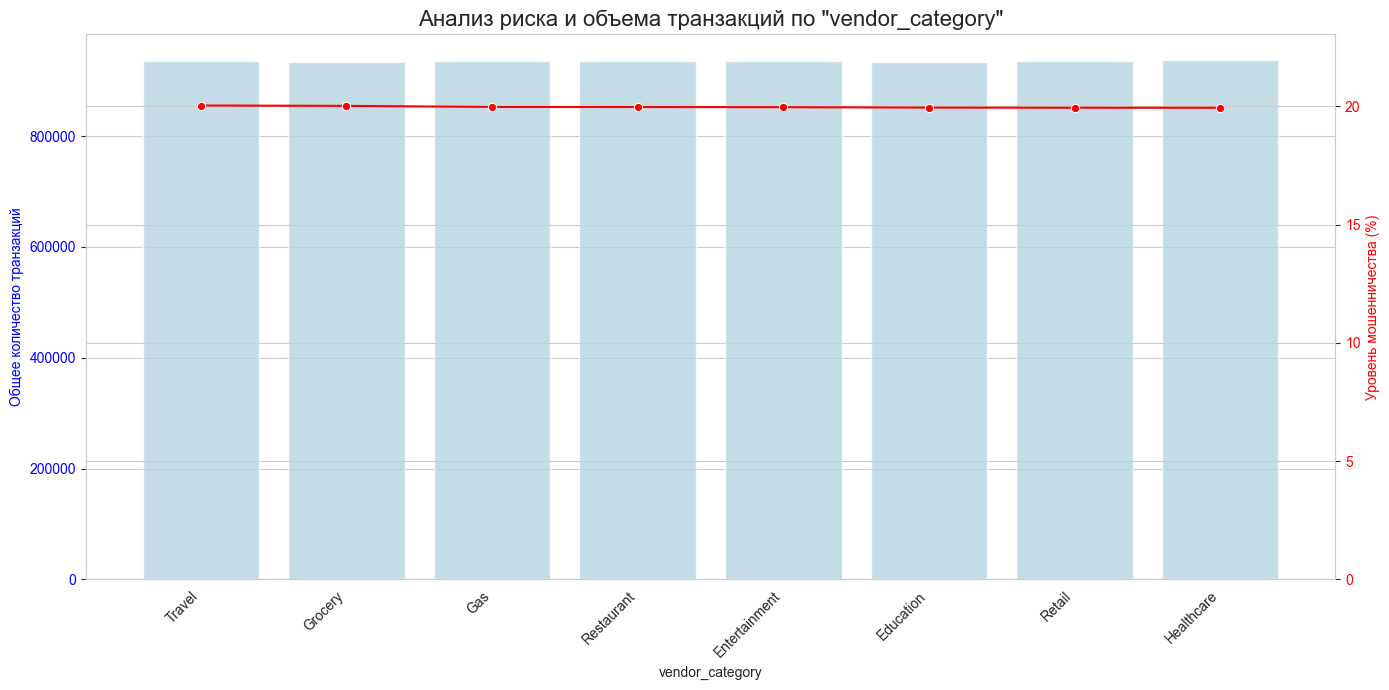

In [4]:
# Анализ и построение графика для vendor_category
vendor_category_analysis = analyze_risk_by_category(df, 'vendor_category')
plot_risk_analysis(vendor_category_analysis, 'vendor_category')

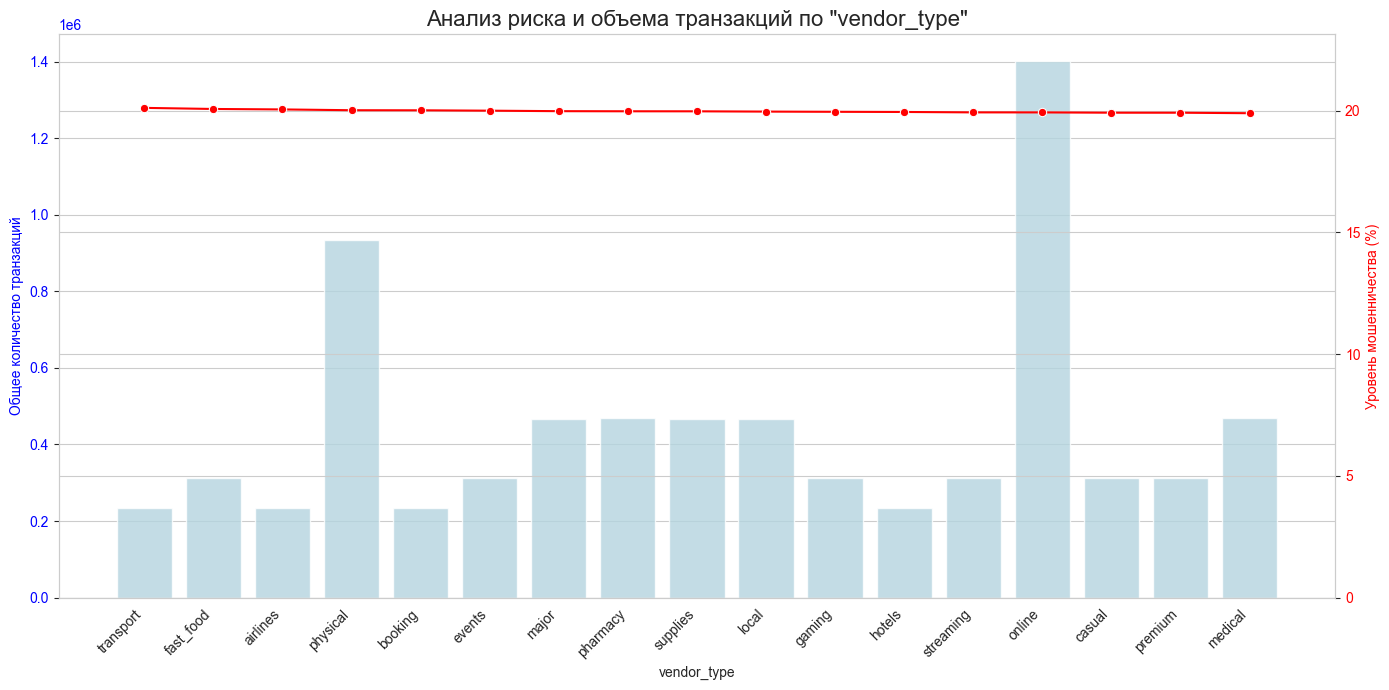

In [5]:
# Анализ и построение графика для vendor_type
vendor_type_analysis = analyze_risk_by_category(df, 'vendor_type')
plot_risk_analysis(vendor_type_analysis, 'vendor_type')

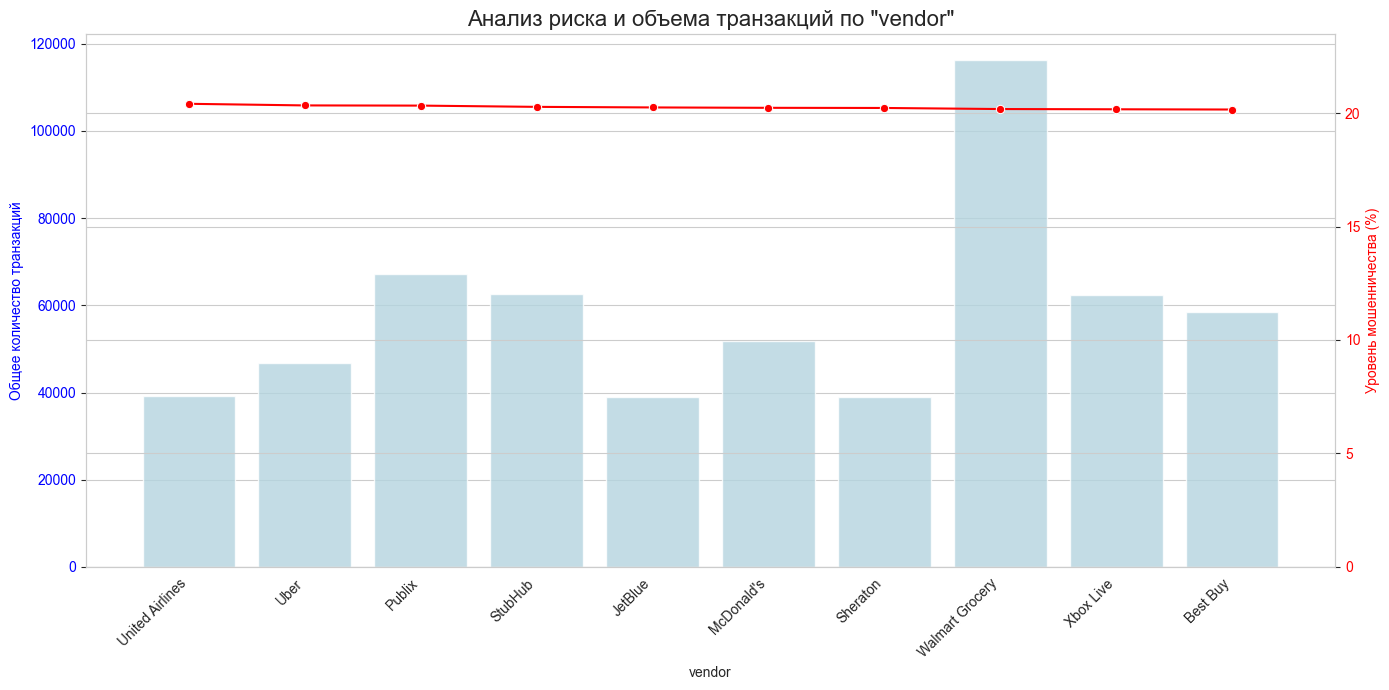

In [6]:
# Анализ и построение графика для топ-10 самых рискованных 'vendor'
vendor_analysis = analyze_risk_by_category(df, 'vendor', top_n=10)
plot_risk_analysis(vendor_analysis, 'vendor')

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 30) # Чтобы видеть больше строк

# Предполагаем, что df уже загружен
# def analyze_risk_by_category(dataframe, category_column): ... (функция из прошлого ответа)

print("--- Анализ по ОБЩИМ КАТЕГОРИЯМ (vendor_category) ---")
category_analysis = analyze_risk_by_category(df, 'vendor_category')
# Сортируем по риску для наглядности
print(category_analysis.sort_values('fraud_rate', ascending=False))


print("\n\n--- Анализ по ТИПАМ ПРОДАВЦОВ (vendor_type) ---")
type_analysis = analyze_risk_by_category(df, 'vendor_type')
# Сортируем по риску для наглядности
print(type_analysis.sort_values('fraud_rate', ascending=False))

--- Анализ по ОБЩИМ КАТЕГОРИЯМ (vendor_category) ---
  vendor_category  total_transactions  fraud_transactions  fraud_rate
7          Travel              935790              187477   20.034089
3         Grocery              934029              186987   20.019400
2             Gas              935401              186829   19.973145
5      Restaurant              936178              186951   19.969600
1   Entertainment              936173              186890   19.963191
0       Education              933542              186203   19.945862
6          Retail              935883              186613   19.939779
4      Healthcare              936770              186769   19.937551


--- Анализ по ТИПАМ ПРОДАВЦОВ (vendor_type) ---
   vendor_type  total_transactions  fraud_transactions  fraud_rate
16   transport              233977               47069   20.116935
4    fast_food              312805               62786   20.071930
0     airlines              233476               46820   20.053453